In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [7]:
from config import password

protocol = 'postgresql'
username = 'postgres'
# password = {password}
host = 'localhost'
port = 5432
database_name = 'telecom_customers'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

In [33]:
telecoms_data = "./data/telecom_customer_churn.csv"
telecoms_df = pd.read_csv(telecoms_data)

telecoms_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [9]:
telecoms_df.to_sql(name='raw_customer_info', con=engine, if_exists='append', index=False)

In [10]:
engine.table_names()

['raw_customer_info']

In [9]:
pd.read_sql_query('select * from raw_customer_info', con=engine).head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,None,None
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,None,None
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [11]:
telecoms_df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [16]:
telecoms_df = telecoms_df.drop_duplicates()

telecoms_df


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [17]:
telecoms_df = telecoms_df.dropna(how = 'all')

telecoms_df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [18]:
telecoms_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [34]:
telecoms_df = telecoms_df.drop(columns = ['Churn Category', 'Churn Reason', 'Customer ID','Latitude', 'Longitude', 'Offer', 'Avg Monthly Long Distance Charges', 'Multiple Lines','Avg Monthly GB Download','Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data', 'Paperless Billing', 'Payment Method','Monthly Charge', 'Total Charges','Total Extra Data Charges', 'Total Long Distance Charges'])

telecoms_df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Internet Service,Internet Type,Streaming TV,Streaming Movies,Streaming Music,Contract,Total Refunds,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,2,9,Yes,Yes,Cable,Yes,No,No,One Year,0.00,974.81,Stayed
1,Male,46,No,0,Glendale,91206,0,9,Yes,Yes,Cable,No,Yes,Yes,Month-to-Month,38.33,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,0,4,Yes,Yes,Fiber Optic,No,No,No,Month-to-Month,0.00,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,1,13,Yes,Yes,Fiber Optic,Yes,Yes,No,Month-to-Month,0.00,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,3,3,Yes,Yes,Fiber Optic,Yes,No,No,Month-to-Month,0.00,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,0,13,Yes,Yes,DSL,No,No,Yes,One Year,0.00,1349.74,Stayed
7039,Male,40,Yes,0,Riverbank,95367,1,22,Yes,Yes,Fiber Optic,No,Yes,Yes,Month-to-Month,0.00,2230.10,Churned
7040,Male,22,No,0,Elk,95432,0,2,Yes,Yes,DSL,No,No,No,Month-to-Month,0.00,129.99,Joined
7041,Male,21,Yes,0,Solana Beach,92075,5,67,Yes,Yes,Cable,No,Yes,Yes,Two Year,0.00,4769.69,Stayed


In [35]:
telecoms_df = telecoms_df.drop(columns = ['City', 'Customer Status', 'Internet Type'])

telecoms_df

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Internet Service,Streaming TV,Streaming Movies,Streaming Music,Contract,Total Refunds,Total Revenue
0,Female,37,Yes,0,93225,2,9,Yes,Yes,Yes,No,No,One Year,0.00,974.81
1,Male,46,No,0,91206,0,9,Yes,Yes,No,Yes,Yes,Month-to-Month,38.33,610.28
2,Male,50,No,0,92627,0,4,Yes,Yes,No,No,No,Month-to-Month,0.00,415.45
3,Male,78,Yes,0,94553,1,13,Yes,Yes,Yes,Yes,No,Month-to-Month,0.00,1599.51
4,Female,75,Yes,0,93010,3,3,Yes,Yes,Yes,No,No,Month-to-Month,0.00,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,91941,0,13,Yes,Yes,No,No,Yes,One Year,0.00,1349.74
7039,Male,40,Yes,0,95367,1,22,Yes,Yes,No,Yes,Yes,Month-to-Month,0.00,2230.10
7040,Male,22,No,0,95432,0,2,Yes,Yes,No,No,No,Month-to-Month,0.00,129.99
7041,Male,21,Yes,0,92075,5,67,Yes,Yes,No,Yes,Yes,Two Year,0.00,4769.69


In [36]:
telecoms_df['Gender'] = telecoms_df['Gender'].replace(to_replace=['Female', 'Male'], value=[0, 1])

#Female = 0, Male = 1

telecoms_df

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Internet Service,Streaming TV,Streaming Movies,Streaming Music,Contract,Total Refunds,Total Revenue
0,0,37,Yes,0,93225,2,9,Yes,Yes,Yes,No,No,One Year,0.00,974.81
1,1,46,No,0,91206,0,9,Yes,Yes,No,Yes,Yes,Month-to-Month,38.33,610.28
2,1,50,No,0,92627,0,4,Yes,Yes,No,No,No,Month-to-Month,0.00,415.45
3,1,78,Yes,0,94553,1,13,Yes,Yes,Yes,Yes,No,Month-to-Month,0.00,1599.51
4,0,75,Yes,0,93010,3,3,Yes,Yes,Yes,No,No,Month-to-Month,0.00,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,No,0,91941,0,13,Yes,Yes,No,No,Yes,One Year,0.00,1349.74
7039,1,40,Yes,0,95367,1,22,Yes,Yes,No,Yes,Yes,Month-to-Month,0.00,2230.10
7040,1,22,No,0,95432,0,2,Yes,Yes,No,No,No,Month-to-Month,0.00,129.99
7041,1,21,Yes,0,92075,5,67,Yes,Yes,No,Yes,Yes,Two Year,0.00,4769.69


In [37]:
telecoms_df['Married'] = telecoms_df['Married'].replace(to_replace=['No', 'Yes'], value=[0, 1])
telecoms_df['Phone Service'] = telecoms_df['Phone Service'].replace(to_replace=['No', 'Yes'], value=[0, 1])
telecoms_df['Internet Service'] = telecoms_df['Internet Service'].replace(to_replace=['No', 'Yes'], value=[0, 1])
telecoms_df['Streaming TV'] = telecoms_df['Streaming TV'].replace(to_replace=['No', 'Yes'], value=[0, 1])
telecoms_df['Streaming Movies'] = telecoms_df['Streaming Movies'].replace(to_replace=['No', 'Yes'], value=[0, 1])
telecoms_df['Streaming Music'] = telecoms_df['Streaming Music'].replace(to_replace=['No', 'Yes'], value=[0, 1])
telecoms_df['Contract'] = telecoms_df['Contract'].replace(to_replace=['Month-to-Month', 'One Year', 'Two Year'], value=[0, 1, 2])

# Female = 0, Male = 1
# No = 0, Yes = 1
# Month-to-month = 0, One Year = 1, Two Year = 2

telecoms_df

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Internet Service,Streaming TV,Streaming Movies,Streaming Music,Contract,Total Refunds,Total Revenue
0,0,37,1,0,93225,2,9,1,1,1.0,0.0,0.0,1,0.00,974.81
1,1,46,0,0,91206,0,9,1,1,0.0,1.0,1.0,0,38.33,610.28
2,1,50,0,0,92627,0,4,1,1,0.0,0.0,0.0,0,0.00,415.45
3,1,78,1,0,94553,1,13,1,1,1.0,1.0,0.0,0,0.00,1599.51
4,0,75,1,0,93010,3,3,1,1,1.0,0.0,0.0,0,0.00,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,0,0,91941,0,13,1,1,0.0,0.0,1.0,1,0.00,1349.74
7039,1,40,1,0,95367,1,22,1,1,0.0,1.0,1.0,0,0.00,2230.10
7040,1,22,0,0,95432,0,2,1,1,0.0,0.0,0.0,0,0.00,129.99
7041,1,21,1,0,92075,5,67,1,1,0.0,1.0,1.0,2,0.00,4769.69


In [45]:
telecoms_df.isna().sum()

Gender                     0
Age                        0
Married                    0
Number of Dependents       0
Zip Code                   0
Number of Referrals        0
Tenure in Months           0
Phone Service              0
Internet Service           0
Streaming TV            1526
Streaming Movies        1526
Streaming Music         1526
Contract                   0
Total Refunds              0
Total Revenue              0
dtype: int64

In [47]:
# Remove Streaming columns as they have NaN values

telecoms_df = telecoms_df.drop(columns = ['Streaming TV', 'Streaming Movies', 'Streaming Music'])

telecoms_df

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Internet Service,Contract,Total Refunds,Total Revenue
0,0,37,1,0,93225,2,9,1,1,1,0.00,974.81
1,1,46,0,0,91206,0,9,1,1,0,38.33,610.28
2,1,50,0,0,92627,0,4,1,1,0,0.00,415.45
3,1,78,1,0,94553,1,13,1,1,0,0.00,1599.51
4,0,75,1,0,93010,3,3,1,1,0,0.00,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,0,0,91941,0,13,1,1,1,0.00,1349.74
7039,1,40,1,0,95367,1,22,1,1,0,0.00,2230.10
7040,1,22,0,0,95432,0,2,1,1,0,0.00,129.99
7041,1,21,1,0,92075,5,67,1,1,2,0.00,4769.69


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [48]:
#To standarize the data with standard scaler
telecoms_df_scaled =StandardScaler().fit_transform(telecoms_df)
print(telecoms_df_scaled[0:5])

[[-1.00955867 -0.56777322  1.03453023 -0.4868349  -0.14061486  0.01603903
  -0.95299362  0.32743831  0.52592737  0.28902128 -0.24831297 -0.71887199]
 [ 0.99053183 -0.03043292 -0.96662231 -0.4868349  -1.22806568 -0.65040855
  -0.95299362  0.32743831  0.52592737 -0.88965671  4.60232501 -0.84610754]
 [ 0.99053183  0.20838499 -0.96662231 -0.4868349  -0.46270282 -0.65040855
  -1.15673995  0.32743831  0.52592737 -0.88965671 -0.24831297 -0.914111  ]
 [ 0.99053183  1.88011037  1.03453023 -0.4868349   0.5746574  -0.31718476
  -0.78999655  0.32743831  0.52592737 -0.88965671 -0.24831297 -0.5008267 ]
 [-1.00955867  1.70099694  1.03453023 -0.4868349  -0.25641572  0.34926281
  -1.19748922  0.32743831  0.52592737 -0.88965671 -0.24831297 -0.95805863]]


In [49]:
#Apply PCA to reduce dimensions
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
telecoms_df_pca = pca.fit_transform(telecoms_df_scaled)

In [51]:
# Transform PCA data to a DataFrame
telecoms_reduced = pd.DataFrame(
    data=telecoms_df_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9"]
)
telecoms_reduced.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-0.352968,0.490947,0.468665,-0.845036,-0.580600,0.105834,-0.506932,-0.426923,-0.751722
1,-1.737020,-0.611964,0.198748,-0.779807,3.931923,2.227387,1.340786,-1.296938,-0.091280
2,-2.110750,-0.356938,0.108116,0.022444,0.448710,-0.861800,0.697985,-0.196039,0.075036
3,-0.773957,-0.430839,0.886990,0.070635,1.311215,-1.806099,-0.760647,0.545982,-0.113958
4,-0.942410,0.093287,1.264041,-1.661672,0.475510,-0.931786,-1.284370,0.673195,-0.415244


In [52]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [53]:
# Reduce dimensions
tsne_features = tsne.fit_transform(telecoms_reduced)

c:\Users\calum\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [54]:
# The dataset has 2 columns
tsne_features.shape

(7043, 2)

In [55]:
# Prepare to plot the dataset

# The first column of transformed features
telecoms_reduced['x'] = tsne_features[:,0]

# The second column of transformed features
telecoms_reduced['y'] = tsne_features[:,1]

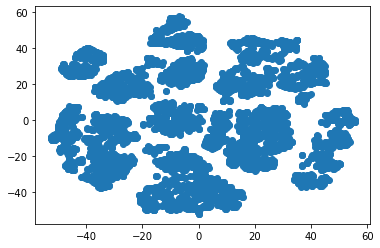

In [56]:
# Visualize the clusters
plt.scatter(telecoms_reduced['x'], telecoms_reduced['y'])
plt.show()

In [62]:
#Cluster analysis using k-means
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

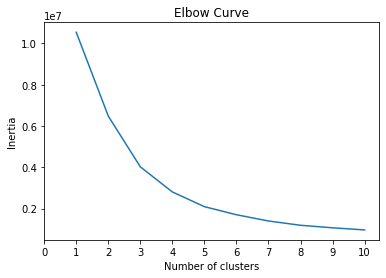

In [63]:
#To create an Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [64]:
# Initializing model
model = KMeans(n_clusters=5, random_state=5)

In [65]:
# Fitting model
model.fit(telecoms_reduced)

KMeans(n_clusters=5, random_state=5)

In [66]:
# Predict clusters
predictions = model.predict(telecoms_reduced)

# Add the predicted class column to the dataframe
telecoms_reduced["class"] = model.labels_
telecoms_reduced.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,x,y,class
0,-0.352968,0.490947,0.468665,-0.845036,-0.580600,0.105834,-0.506932,-0.426923,-0.751722,-15.410872,-42.955093,1
1,-1.737020,-0.611964,0.198748,-0.779807,3.931923,2.227387,1.340786,-1.296938,-0.091280,-7.894157,4.247639,3
2,-2.110750,-0.356938,0.108116,0.022444,0.448710,-0.861800,0.697985,-0.196039,0.075036,35.249851,25.244345,0
3,-0.773957,-0.430839,0.886990,0.070635,1.311215,-1.806099,-0.760647,0.545982,-0.113958,30.579466,2.976847,2
4,-0.942410,0.093287,1.264041,-1.661672,0.475510,-0.931786,-1.284370,0.673195,-0.415244,-10.832561,-49.366295,1


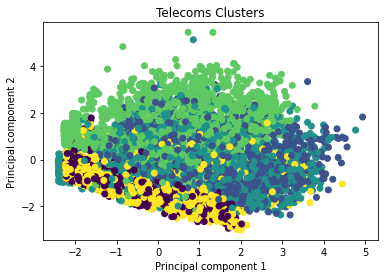

In [67]:
# Visualize the clusters
plt.scatter(x=telecoms_reduced['principal component 1'], y=telecoms_reduced['principal component 2'], c=telecoms_reduced['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Telecoms Clusters')
plt.show()

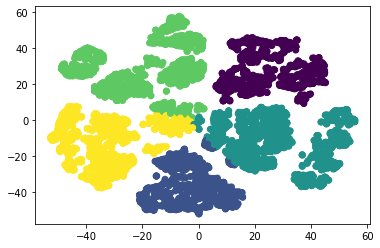

In [68]:
# Visualize the clusters
plt.scatter(telecoms_reduced['x'], telecoms_reduced['y'], c=telecoms_reduced['class'])
plt.show()